In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
fp = open('./metrics.txt', 'r')
metrics = fp.read()
metrics = metrics.split('\n')
fp.close()

In [3]:
con_fp = open('config.json', 'r')
config_data = json.load(con_fp)
con_fp.close()
num_folds = config_data['data_loader']['args']['num_folds']
num_epochs = config_data['trainer']['epochs']

In [4]:
for i in range(len(metrics)):
    metrics[i] = metrics[i].replace(" ", "").replace("\t", "").replace("\n", "")

In [5]:
def get_data(data, metric):
    kfolds_data = []
    k_data = []
    check_exist = []
    
    for val in data:
        if val.find('epoch') == 0:
            if val in check_exist:
                check_exist = []
                check_exist.append(val)
                kfolds_data.append(k_data)
                k_data = []
            else:
                check_exist.append(val)
        else:
            if val.find(metric) == 0:
                k_data.append(float(val.split(':')[1]))
    kfolds_data.append(k_data)
    return np.array(kfolds_data)

In [6]:
loss_vals = get_data(metrics, 'loss')
accuracy_vals = get_data(metrics, 'accuracy')
val_losses = get_data(metrics, 'val_loss')
val_accuracies = get_data(metrics, 'val_accuracy')

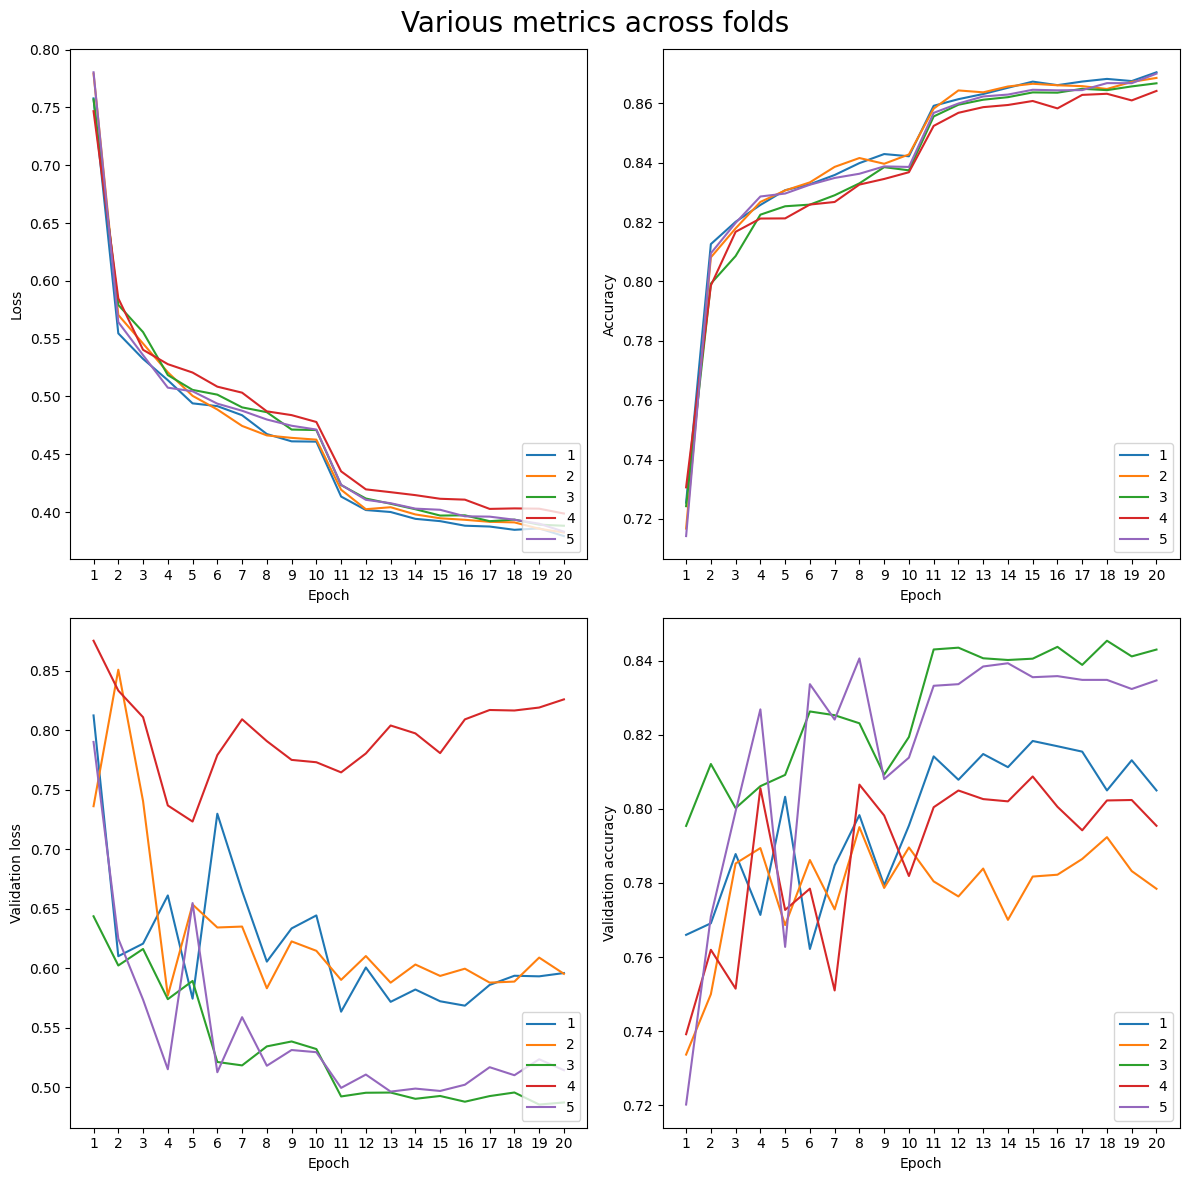

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
x = range(1, num_epochs + 1)

for val in loss_vals:
    axes[0][0].plot(x, val)
    axes[0][0].set_xticks(x)
axes[0][0].legend(range(1, num_folds + 1), loc = 'lower right')
axes[0][0].set_xlabel('Epoch')
axes[0][0].set_ylabel('Loss')

for val in accuracy_vals:
    axes[0][1].plot(x, val)
    axes[0][1].set_xticks(x)
axes[0][1].legend(range(1, num_folds + 1), loc = 'lower right')
axes[0][1].set_xlabel('Epoch')
axes[0][1].set_ylabel('Accuracy')

for val in val_losses:
    axes[1][0].plot(x, val)
    axes[1][0].set_xticks(x)
axes[1][0].legend(range(1, num_folds + 1), loc = 'lower right')
axes[1][0].set_xlabel('Epoch')
axes[1][0].set_ylabel('Validation loss')

for val in val_accuracies:
    axes[1][1].plot(x, val)
    axes[1][1].set_xticks(x)
axes[1][1].set_xlabel('Epoch')
axes[1][1].set_ylabel('Validation accuracy')
axes[1][1].legend(range(1, num_folds + 1), loc = 'lower right')

fig.suptitle('Various metrics across folds', fontsize = '20')
fig.tight_layout()